In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import datetime as dt
from pandas.plotting import table
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
data=pd.read_csv('winequality-red.csv')
data.head(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  
0      9.4        5  
1      9.8        5

# classifier

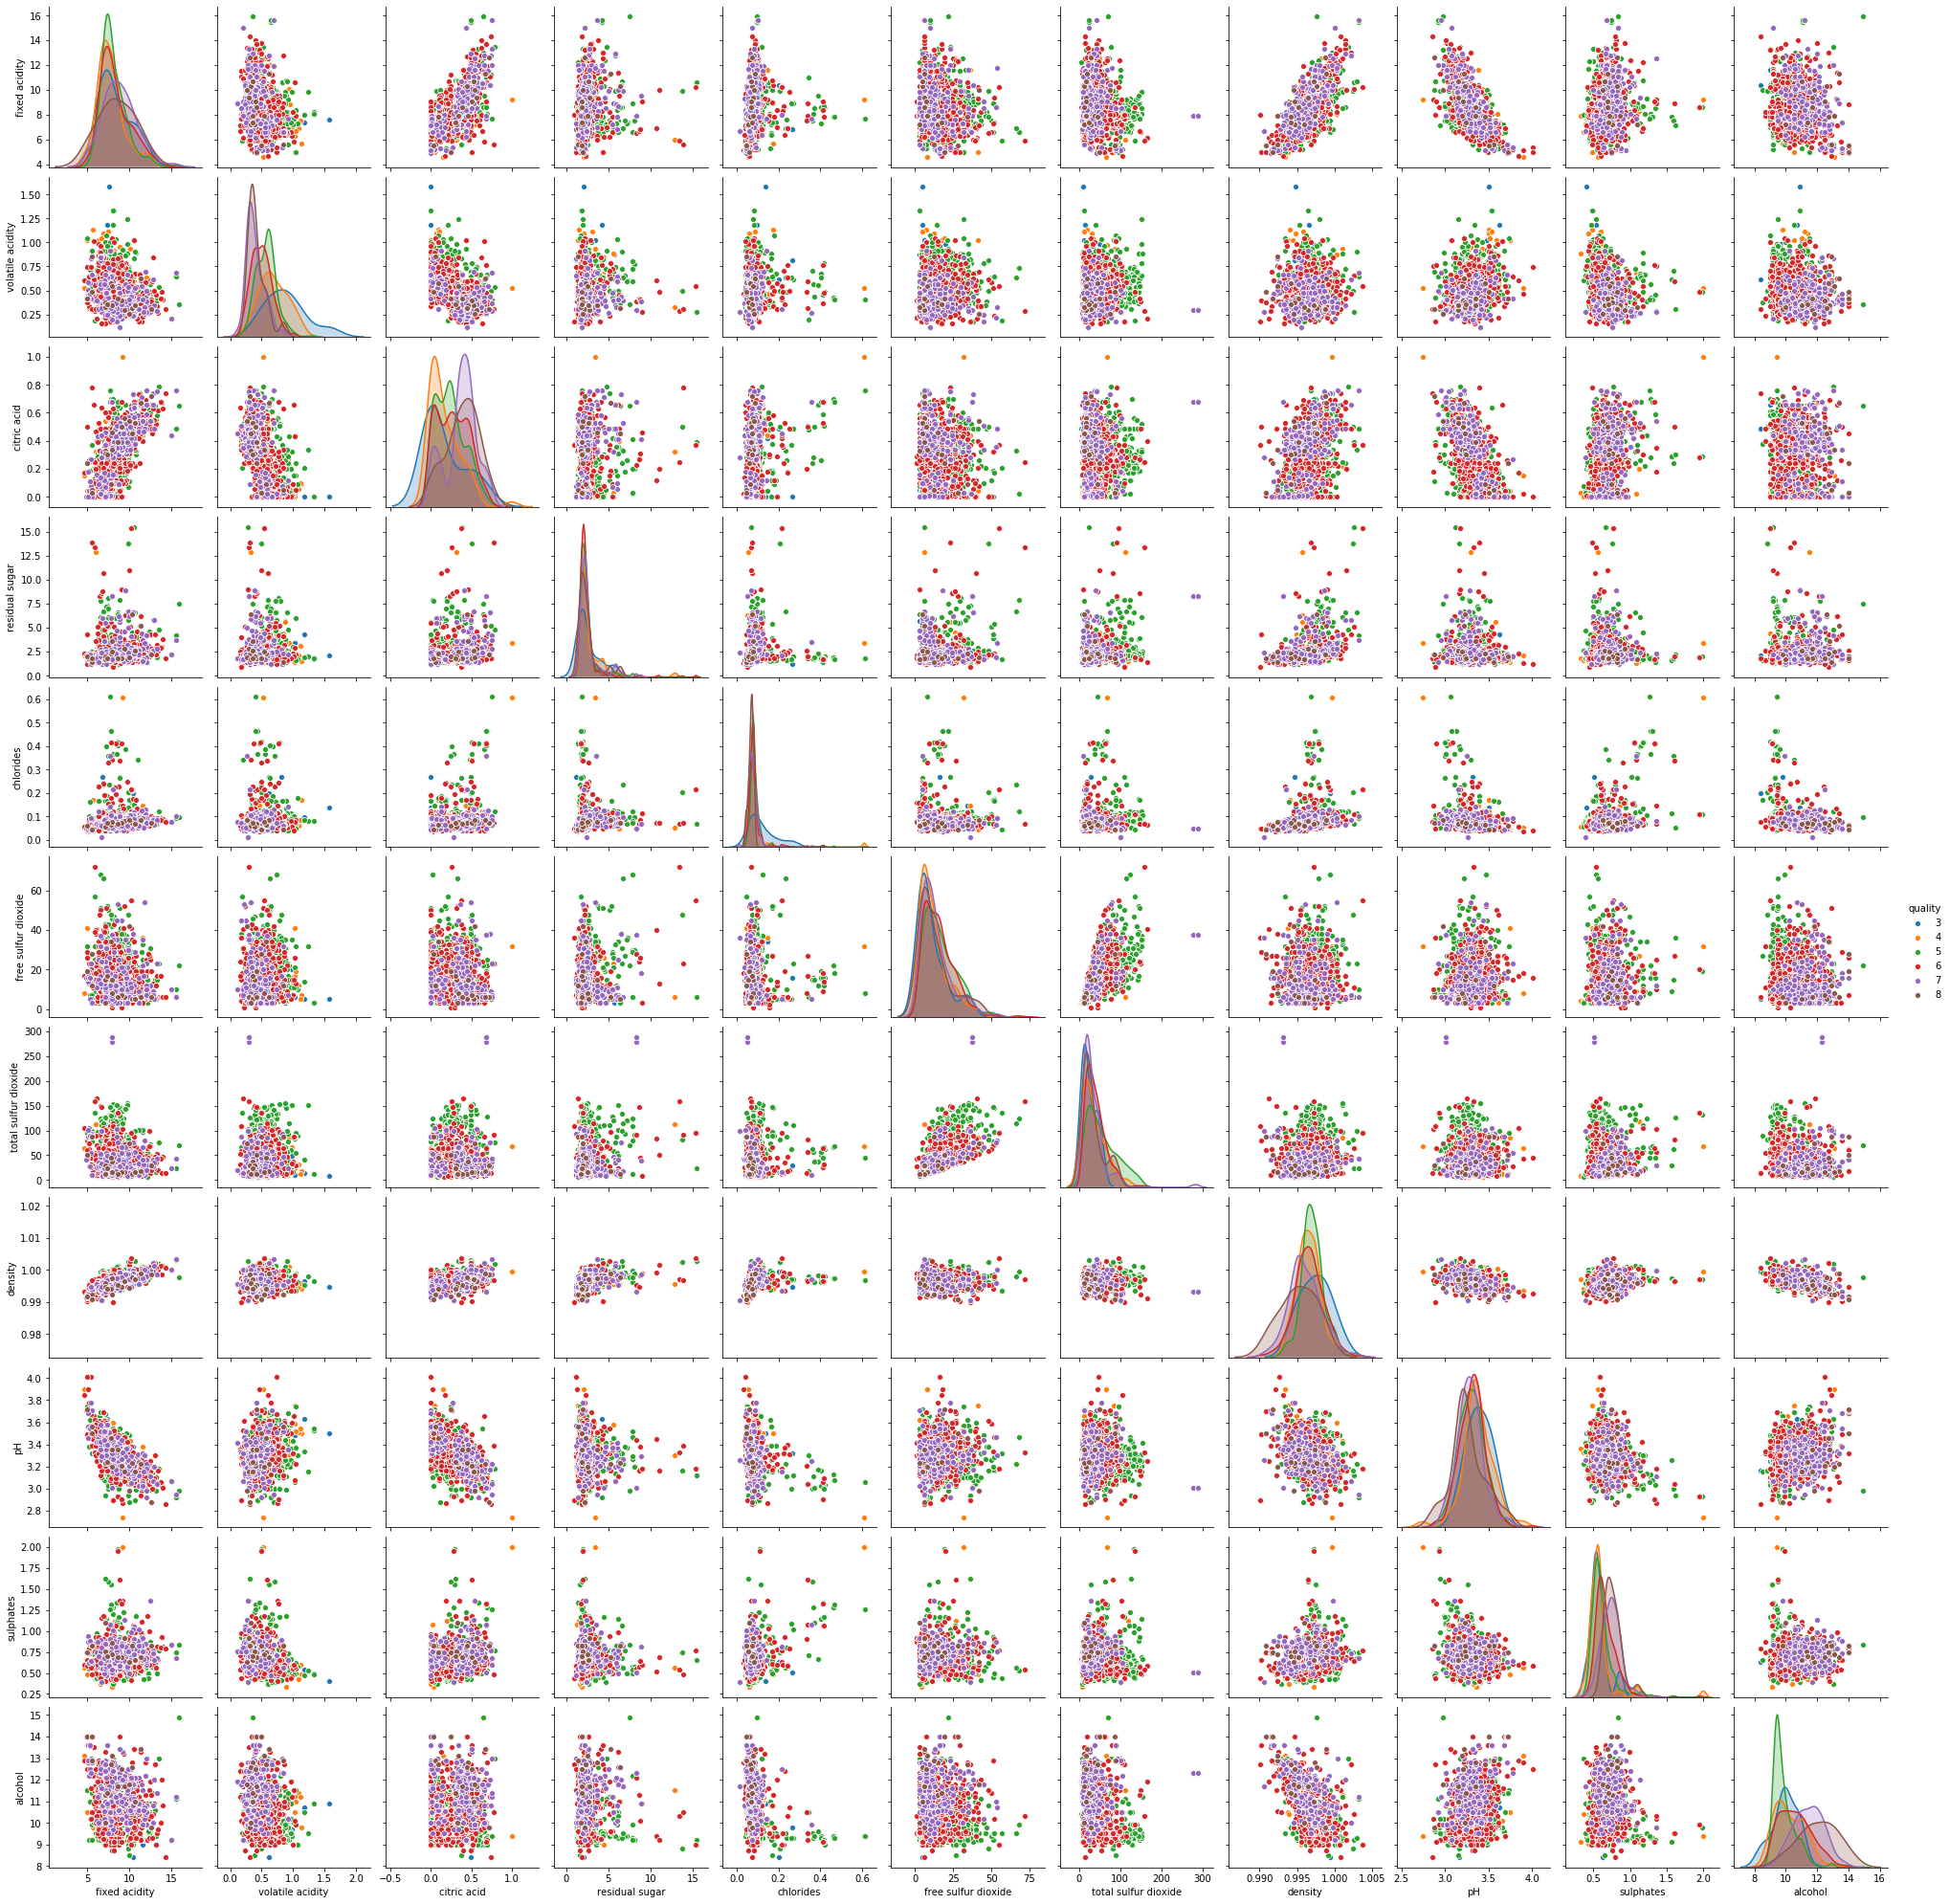

In [3]:
sns.pairplot(data,hue='quality')

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.drop('quality',axis=1),data['quality'])

In [6]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
y_predict = logistic.predict(X_test)

In [8]:
from sklearn.metrics import classification_report,confusion_matrix

In [9]:
confusion_matrix(y_test,y_predict)

array([[  0,   0,   4,   0,   0,   0],
       [  0,   0,  10,   6,   0,   0],
       [  0,   0, 132,  40,   0,   0],
       [  0,   0,  57, 103,   0,   0],
       [  0,   0,   3,  40,   0,   0],
       [  0,   0,   0,   4,   1,   0]], dtype=int64)

In [10]:
classification_report(y_test,y_predict)

'              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         4\n           4       0.00      0.00      0.00        16\n           5       0.64      0.77      0.70       172\n           6       0.53      0.64      0.58       160\n           7       0.00      0.00      0.00        43\n           8       0.00      0.00      0.00         5\n\n    accuracy                           0.59       400\n   macro avg       0.20      0.24      0.21       400\nweighted avg       0.49      0.59      0.53       400\n'

In [11]:
logistic.get_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

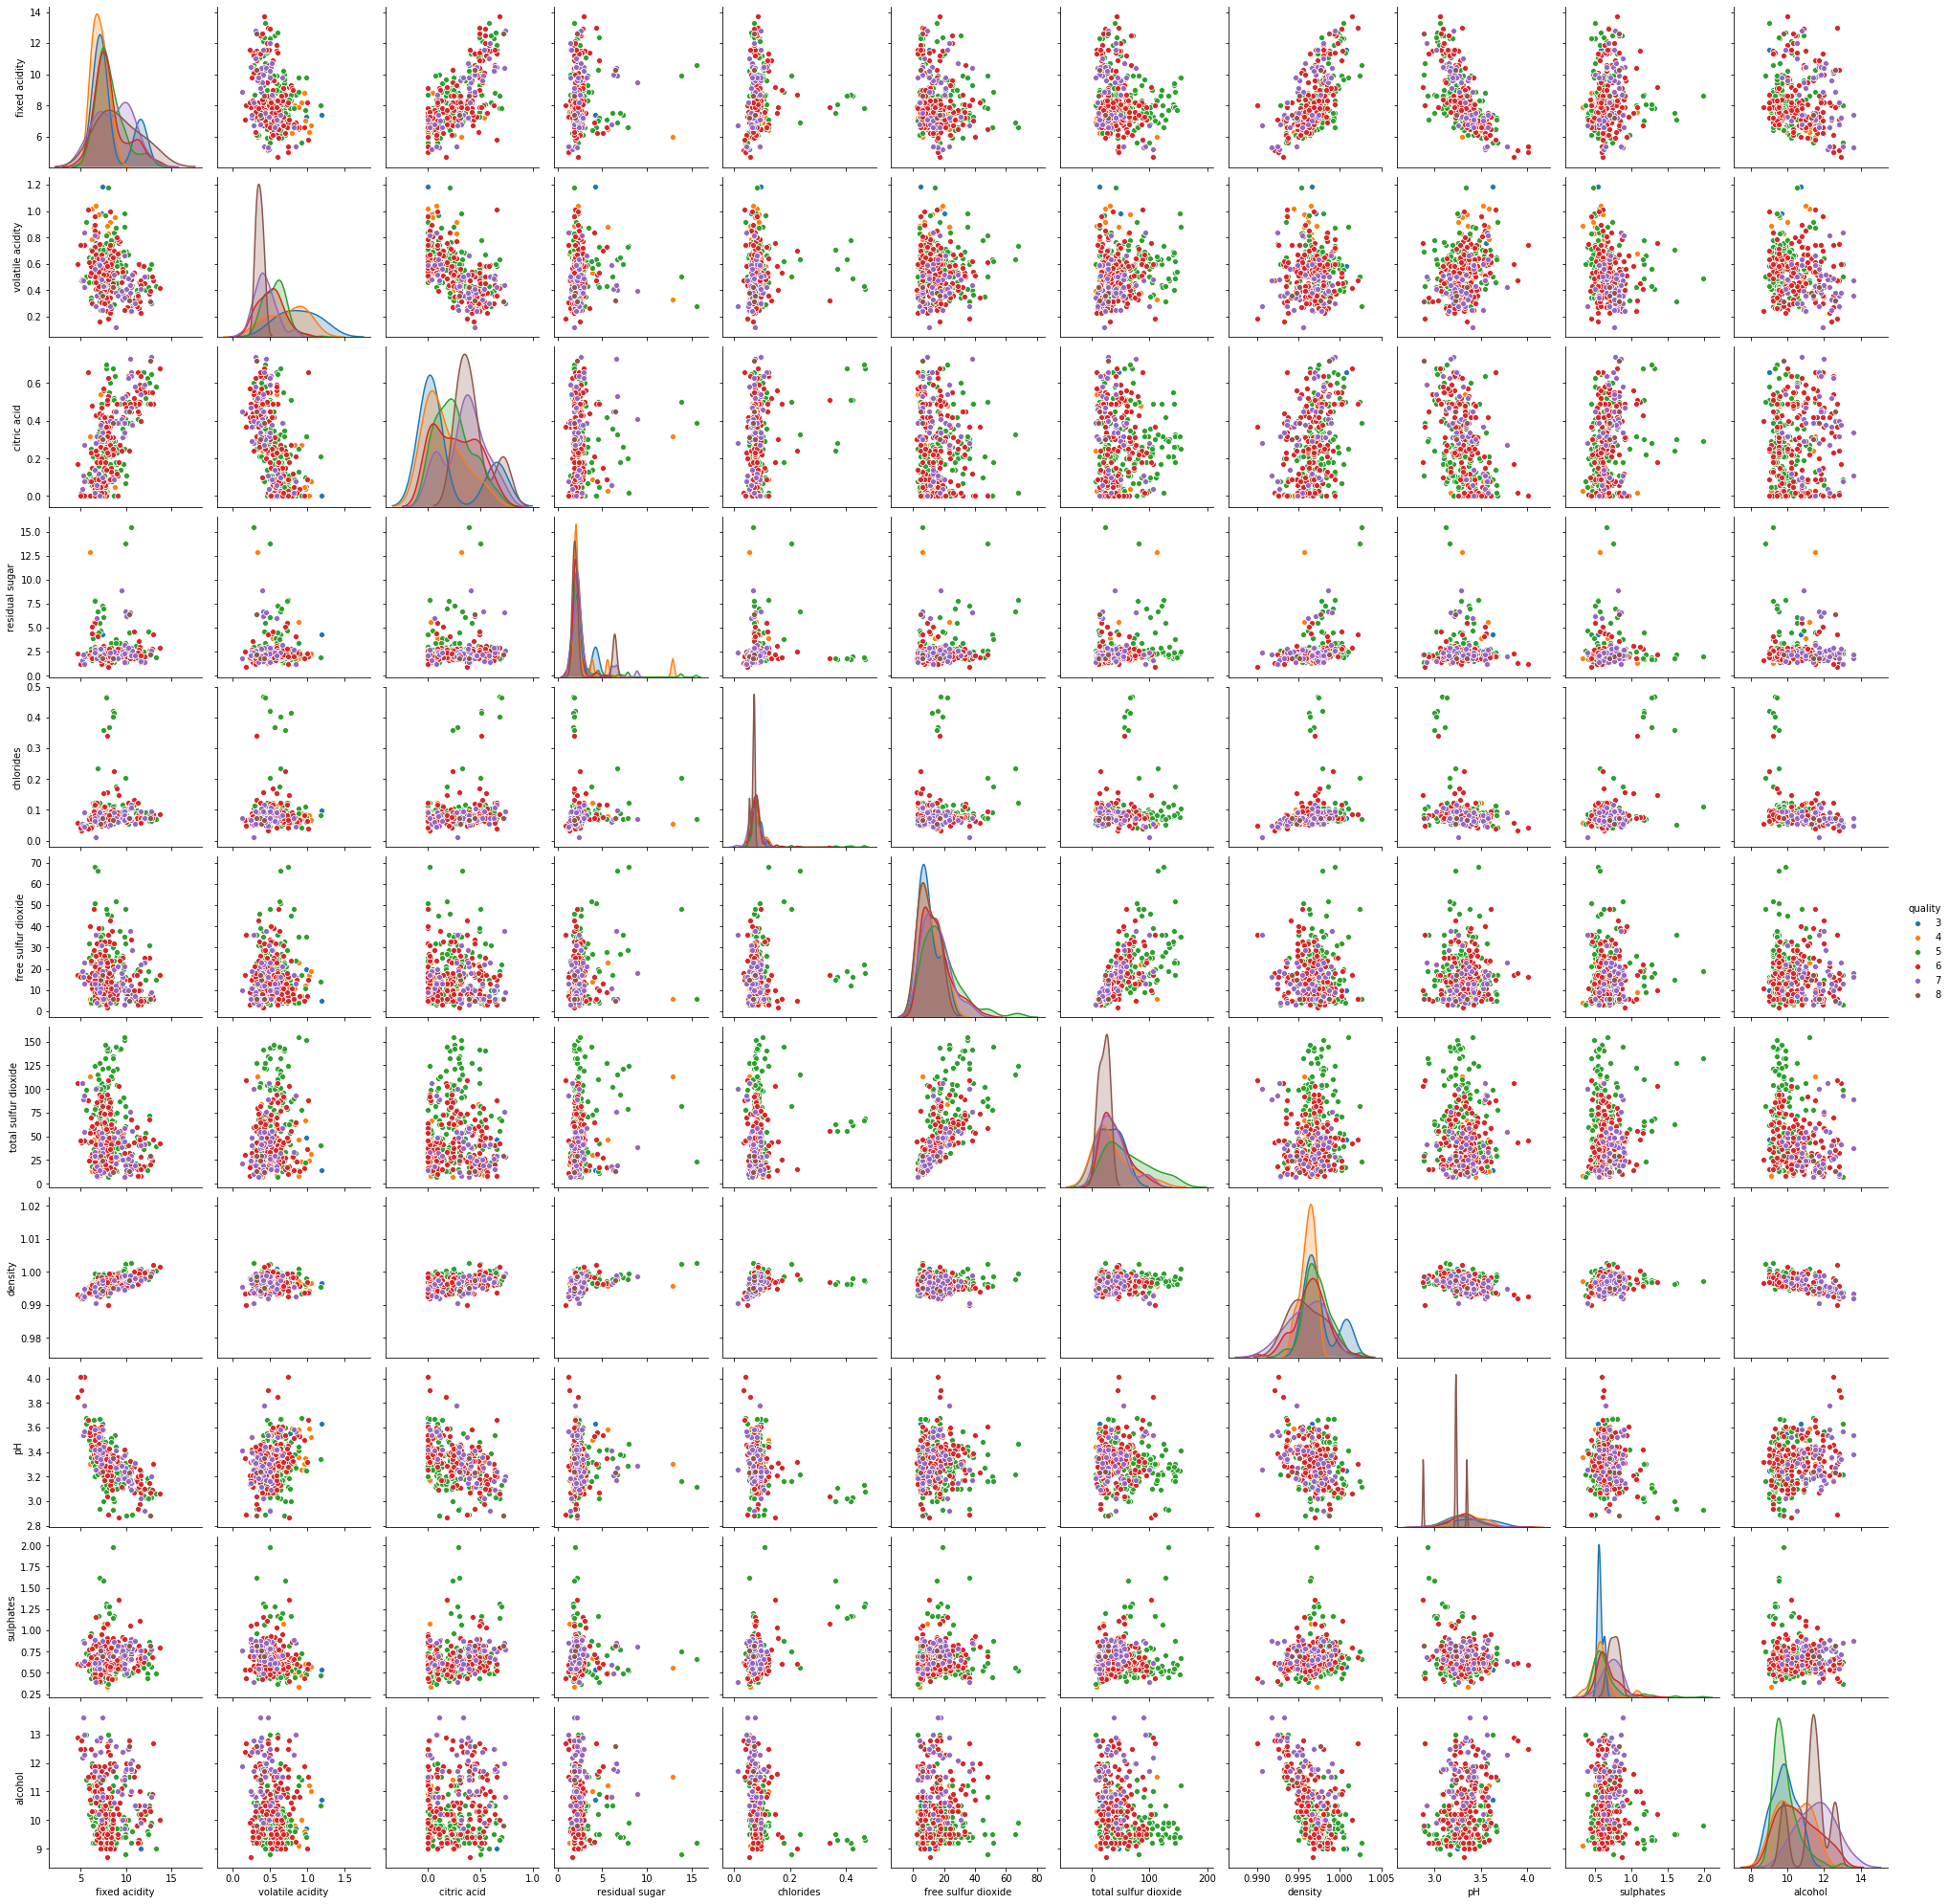

In [12]:
test_data = pd.concat([X_test,y_test],axis=1)
test_data.head()
sns.pairplot(test_data,hue='quality')

In [13]:
from sklearn.svm import SVC
classifier = SVC()

In [14]:
classifier.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [15]:
svmy_predict = classifier.predict(X_test)

In [16]:
confusion_matrix(y_test,svmy_predict)

array([[  0,   0,   1,   3,   0,   0],
       [  0,   0,   4,  12,   0,   0],
       [  0,   0,  88,  84,   0,   0],
       [  0,   0,  34, 126,   0,   0],
       [  0,   0,   4,  39,   0,   0],
       [  0,   0,   0,   5,   0,   0]], dtype=int64)

In [17]:
print(classification_report(y_test,svmy_predict))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        16
           5       0.67      0.51      0.58       172
           6       0.47      0.79      0.59       160
           7       0.00      0.00      0.00        43
           8       0.00      0.00      0.00         5

    accuracy                           0.54       400
   macro avg       0.19      0.22      0.19       400
weighted avg       0.48      0.54      0.48       400



In [18]:
from sklearn.ensemble import RandomForestClassifier
random_classifier = RandomForestClassifier()
random_classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
random_predict = random_classifier.predict(X_test)

In [20]:
print(classification_report(y_test,random_predict))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        16
           5       0.70      0.80      0.75       172
           6       0.64      0.68      0.66       160
           7       0.70      0.53      0.61        43
           8       0.00      0.00      0.00         5

    accuracy                           0.67       400
   macro avg       0.34      0.34      0.34       400
weighted avg       0.63      0.67      0.65       400



In [21]:
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [22]:
y_pred = nvclassifier.predict(X_test)
print(y_pred)

[5 5 7 5 6 5 6 6 5 6 6 7 5 7 5 5 6 6 6 4 6 6 6 5 5 6 6 6 6 5 6 6 5 7 5 8 6
 6 5 6 4 7 5 8 6 6 5 5 7 5 5 6 5 5 7 5 6 7 5 6 5 6 5 5 7 5 5 5 5 7 5 5 5 5
 4 6 5 7 6 5 5 6 6 6 5 6 7 5 6 5 5 5 6 5 5 6 5 6 6 6 5 5 7 6 6 7 5 5 7 5 5
 5 6 7 5 5 5 6 5 6 6 5 6 5 7 5 5 6 5 5 7 6 5 7 7 6 6 7 6 5 5 5 5 5 4 6 6 6
 4 5 6 7 4 6 5 7 5 5 4 5 5 5 6 5 6 5 5 5 5 5 6 5 5 6 5 5 5 5 6 5 5 5 5 7 5
 6 6 5 5 6 8 6 5 6 5 5 5 4 6 5 5 5 5 5 7 5 5 6 5 5 6 5 5 7 6 5 6 5 5 6 6 5
 5 7 5 6 7 7 4 5 4 5 5 5 6 4 6 6 5 7 7 5 7 5 5 6 5 5 5 6 5 6 5 6 7 5 5 5 5
 5 7 8 5 5 5 5 5 6 5 6 6 5 6 6 5 5 6 6 5 5 7 6 5 5 5 6 8 6 5 7 6 5 6 5 5 5
 5 5 7 5 5 6 5 5 5 6 5 5 4 5 6 6 5 5 6 6 7 7 6 7 5 7 5 6 6 5 7 5 7 6 6 5 6
 4 7 6 7 7 7 7 5 5 4 6 7 5 5 3 5 5 5 6 5 5 5 5 5 5 7 6 7 5 4 5 7 5 5 6 5 6
 6 5 5 5 5 5 4 5 5 6 4 6 6 6 5 5 5 7 5 6 7 7 5 5 6 5 6 6 5 6]


In [25]:
y_compare = np.vstack((y_test,y_pred)).T
y_compare[:12,:]

array([[5, 5],
       [5, 5],
       [7, 7],
       [5, 5],
       [5, 6],
       [4, 5],
       [5, 6],
       [6, 6],
       [6, 5],
       [4, 6],
       [4, 6],
       [6, 7]], dtype=int64)

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[  1   0   2   1   0   0]
 [  0   1   9   6   0   0]
 [  0  10 118  40   3   1]
 [  0   6  68  54  30   2]
 [  0   0   5  17  19   2]
 [  0   0   0   2   3   0]]


# Data Exploration

In [29]:
data=pd.read_csv('winequality-red.csv')
data.head(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  
0      9.4        5  
1      9.8        5

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [37]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

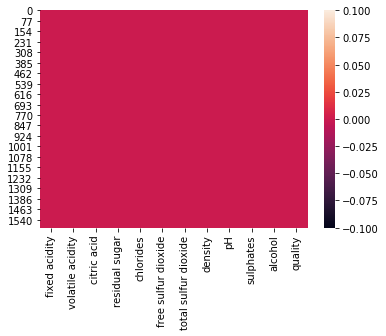

In [39]:
sns.heatmap(data.isnull())

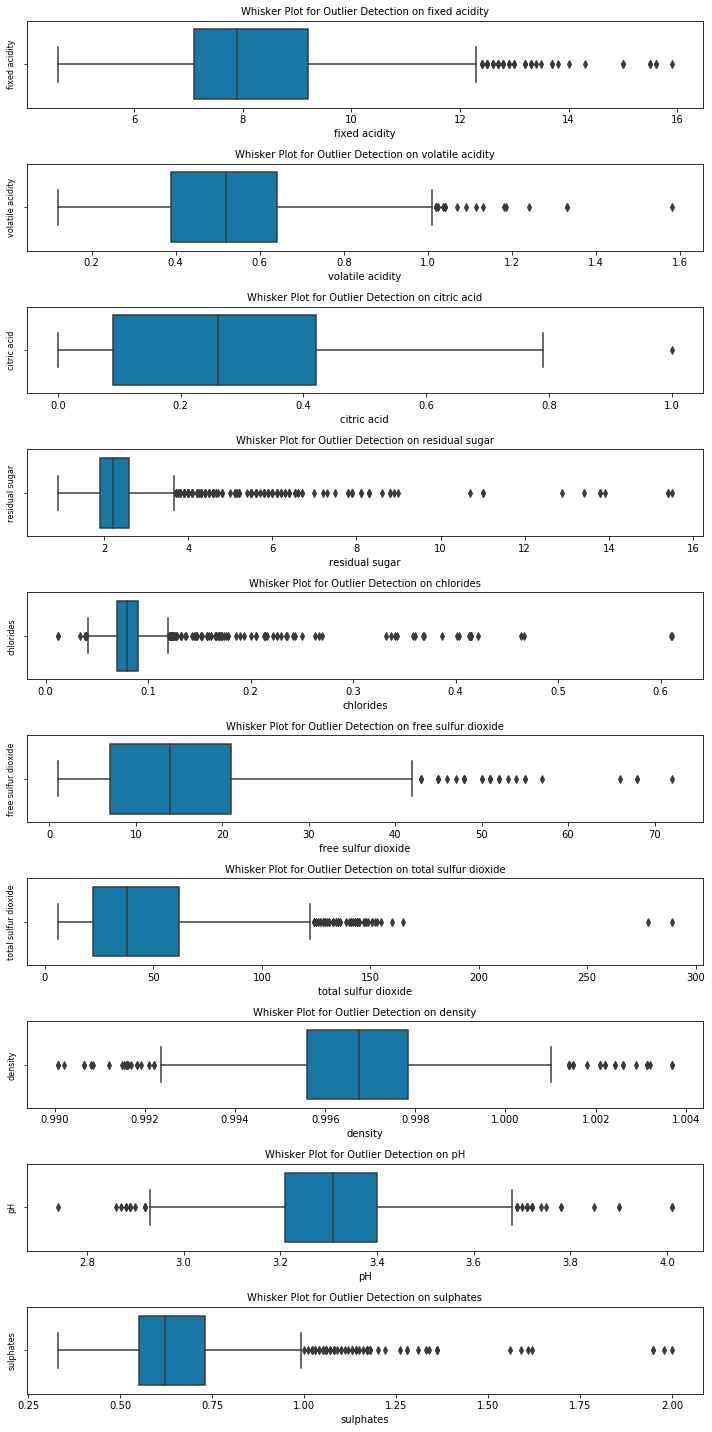

In [40]:
Column_List = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates']
fig, ax = plt.subplots (len(Column_List), figsize = (10, 20))

for i, col_list in enumerate(Column_List):
    sns.boxplot(data[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Whisker Plot for Outlier Detection on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

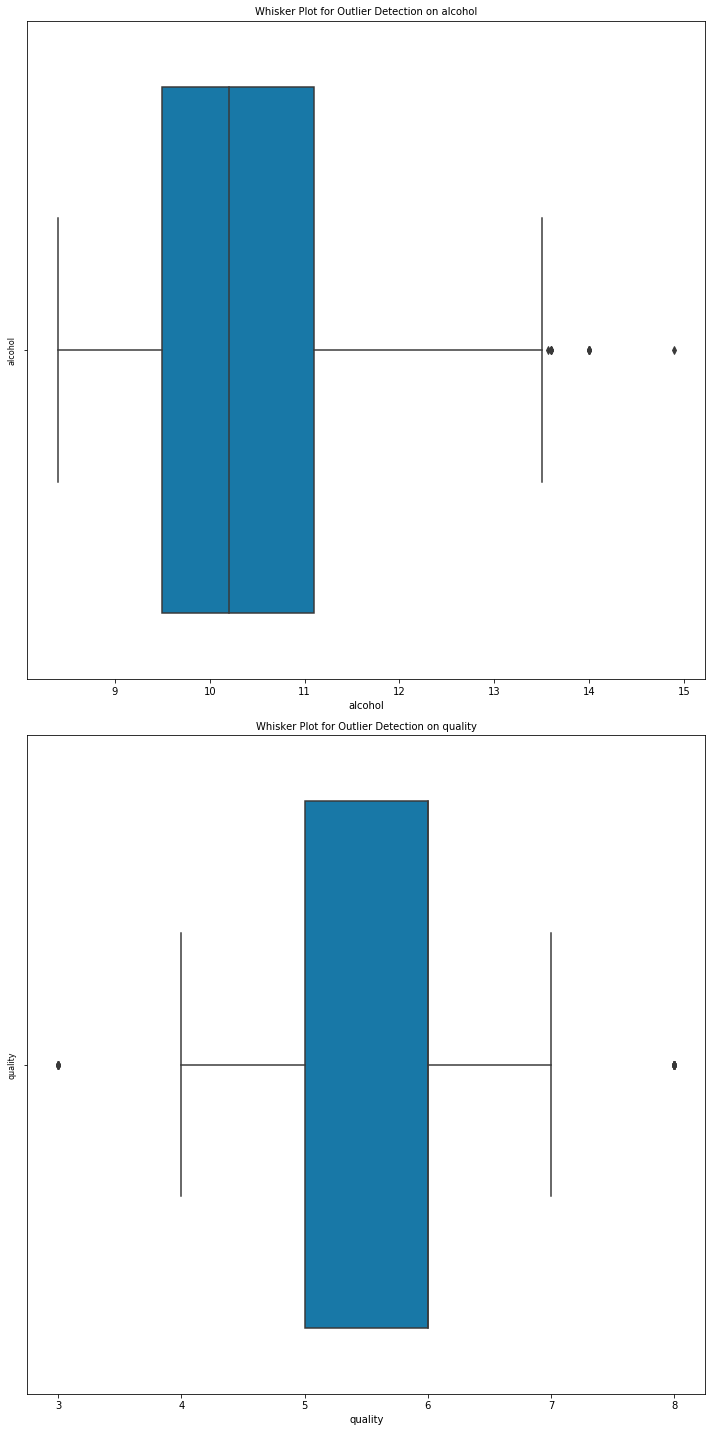

In [48]:
Column_List = ['alcohol','quality']
fig, ax = plt.subplots (len(Column_List), figsize = (10, 20))

for i, col_list in enumerate(Column_List):
    sns.boxplot(data[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Whisker Plot for Outlier Detection on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

In [53]:
Desp_Statistics=data.describe()
Desp_Statistics=Desp_Statistics.T
Desp_Statistics['IQR']=Desp_Statistics['75%']-Desp_Statistics['25%']
data = data[(np.abs(stats.zscore(data[['fixed acidity', 'volatile acidity', 'citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])) < 11).all(axis = 1)]
#data = data.reset_index()
#data=data.drop(columns=['index'])
data.head(2)

level_0  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        0            7.4              0.70          0.0             1.9   
1        1            7.8              0.88          0.0             2.6   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5

In [54]:
data=data.drop(columns=['level_0'])

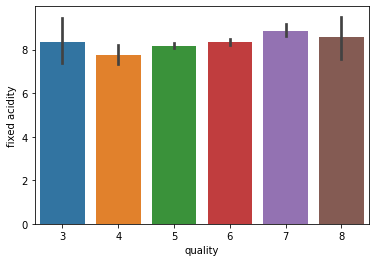

In [55]:
sns.barplot(x='quality',y='fixed acidity',data=data)

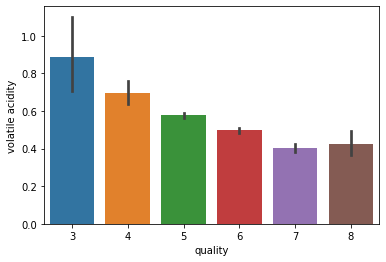

In [56]:
sns.barplot(x='quality',y='volatile acidity',data=data)

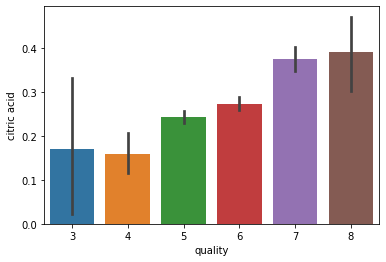

In [57]:
sns.barplot(x='quality',y='citric acid',data=data)

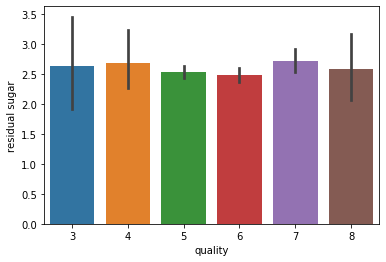

In [58]:
sns.barplot(x='quality',y='residual sugar',data=data)

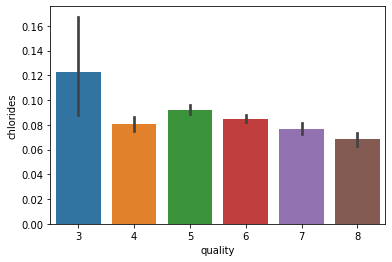

In [59]:
sns.barplot(x='quality',y='chlorides',data=data)

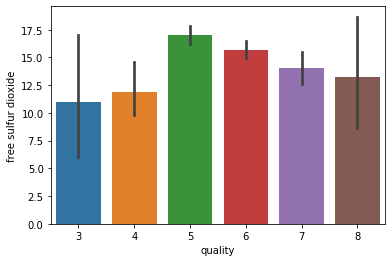

In [60]:
sns.barplot(x='quality',y='free sulfur dioxide',data=data)

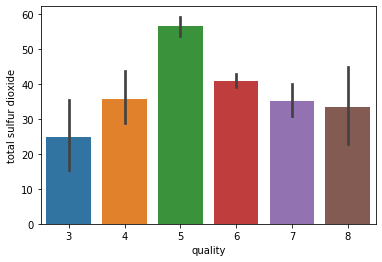

In [61]:
sns.barplot(x='quality',y='total sulfur dioxide',data=data)

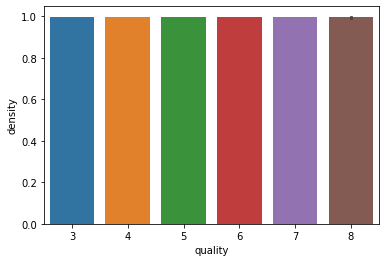

In [62]:
sns.barplot(x='quality',y='density',data=data)

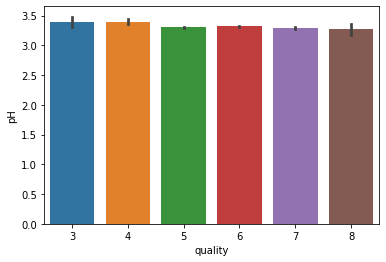

In [63]:
sns.barplot(x='quality',y='pH',data=data)

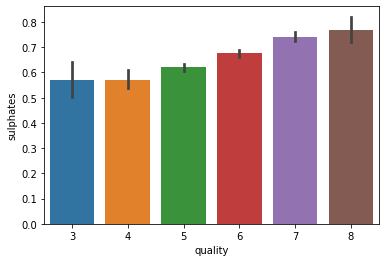

In [64]:
sns.barplot(x='quality',y='sulphates',data=data)

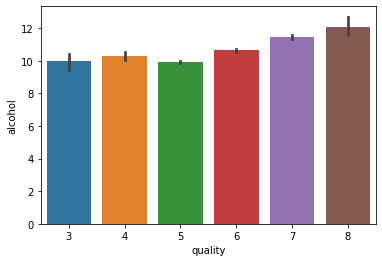

In [65]:
sns.barplot(x='quality',y='alcohol',data=data)

In [80]:
data.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256329     0.675469   
volatile acidity          -0.256329          1.000000    -0.554975   
citric acid                0.675469         -0.554975     1.000000   
residual sugar             0.114504          0.001719     0.143917   
chlorides                  0.100807          0.072002     0.175471   
free sulfur dioxide       -0.154611         -0.010783    -0.063874   
total sulfur dioxide      -0.113438          0.076492     0.034221   
density                    0.668133          0.022098     0.363940   
pH                        -0.685768          0.235404    -0.536834   
sulphates                  0.185745         -0.265680     0.297580   
alcohol                   -0.061621         -0.202855     0.114460   
quality                    0.124717         -0.391571     0.234200   
labels                     0.064136         -0.272472     0.130403   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114504   0.100807            -0.154611   
volatile acidity            0.001719   0.072002            -0.010783   
citric acid                 0.143917   0.175471            -0.063874   
residual sugar              1.000000   0.059849             0.186422   
chlorides                   0.059849   1.000000             0.000093   
free sulfur dioxide         0.186422   0.000093             1.000000   
total sulfur dioxide        0.202822   0.046720             0.667698   
density                     0.355041   0.206723            -0.023430   
pH                         -0.085226  -0.249227             0.073627   
sulphates                   0.003756   0.324756             0.046850   
alcohol                     0.042161  -0.226125            -0.069037   
quality                     0.014272  -0.119089            -0.049190   
labels                     -0.005341  -0.055800            -0.023211   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113438  0.668133 -0.685768   0.185745   
volatile acidity                  0.076492  0.022098  0.235404  -0.265680   
citric acid                       0.034221  0.363940 -0.536834   0.297580   
residual sugar                    0.202822  0.355041 -0.085226   0.003756   
chlorides                         0.046720  0.206723 -0.249227   0.324756   
free sulfur dioxide               0.667698 -0.023430  0.073627   0.046850   
total sulfur dioxide              1.000000  0.070683 -0.065297   0.040625   
density                           0.070683  1.000000 -0.340154   0.144496   
pH                               -0.065297 -0.340154  1.000000  -0.179877   
sulphates                         0.040625  0.144496 -0.179877   1.000000   
alcohol                          -0.205418 -0.495895  0.203590   0.103008   
quality                          -0.184554 -0.173368 -0.063649   0.270029   
labels                           -0.153680 -0.105889 -0.019956   0.149433   

                       alcohol   quality    labels  
fixed acidity        -0.061621  0.124717  0.064136  
volatile acidity     -0.202855 -0.391571 -0.272472  
citric acid           0.114460  0.234200  0.130403  
residual sugar        0.042161  0.014272 -0.005341  
chlorides            -0.226125 -0.119089 -0.055800  
free sulfur dioxide  -0.069037 -0.049190 -0.023211  
total sulfur dioxide -0.205418 -0.184554 -0.153680  
density              -0.495895 -0.173368 -0.105889  
pH                    0.203590 -0.063649 -0.019956  
sulphates             0.103008  0.270029  0.149433  
alcohol               1.000000  0.475452  0.294868  
quality               0.475452  1.000000  0.583263  
labels                0.294868  0.583263  1.000000

In [77]:
plt.style.use('fivethirtyeight')
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [69]:
from sklearn.cluster import KMeans

x = data[['fixed acidity', 'volatile acidity', 'quality']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

In [70]:
data['labels'] =  labels
trace1 = go.Scatter3d(
    x= data['fixed acidity'],
    y= data['volatile acidity'],
    z= data['quality'],
    mode='markers',
     marker=dict(
        color = data['labels'], 
        size= 10,
        line=dict(
            color= data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'fixed acidity'),
            yaxis = dict(title  = 'volatile acidity'),
            zaxis = dict(title  = 'quality')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

In [71]:
from sklearn.cluster import KMeans

x = data[['fixed acidity', 'citric acid', 'quality']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

In [76]:
data['labels'] =  labels
trace1 = go.Scatter3d(
    x= data['fixed acidity'],
    y= data['citric acid'],
    z= data['quality'],
    mode='markers',
     marker=dict(
        color = data['labels'], 
        size= 10,
        line=dict(
            color= data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'fixed acidity'),
            yaxis = dict(title  = 'citric acidity'),
            zaxis = dict(title  = 'quality')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

In [81]:
from sklearn.cluster import KMeans

x = data[['fixed acidity', 'residual sugar', 'quality']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

In [82]:
data['labels'] =  labels
trace1 = go.Scatter3d(
    x= data['fixed acidity'],
    y= data['residual sugar'],
    z= data['quality'],
    mode='markers',
     marker=dict(
        color = data['labels'], 
        size= 10,
        line=dict(
            color= data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'fixed acidity'),
            yaxis = dict(title  = 'residual sugar'),
            zaxis = dict(title  = 'quality')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

In [86]:
x = data[['fixed acidity', 'chlorides', 'quality']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

data['labels'] =  labels
trace1 = go.Scatter3d(
    x= data['fixed acidity'],
    y= data['chlorides'],
    z= data['quality'],
    mode='markers',
     marker=dict(
        color = data['labels'], 
        size= 10,
        line=dict(
            color= data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'fixed acidity'),
            yaxis = dict(title  = 'chlorides'),
            zaxis = dict(title  = 'quality')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

In [87]:
x = data[['fixed acidity', 'free sulfur dioxide', 'quality']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

data['labels'] =  labels
trace1 = go.Scatter3d(
    x= data['fixed acidity'],
    y= data['free sulfur dioxide'],
    z= data['quality'],
    mode='markers',
     marker=dict(
        color = data['labels'], 
        size= 10,
        line=dict(
            color= data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'fixed acidity'),
            yaxis = dict(title  = 'free sulfur dioxide'),
            zaxis = dict(title  = 'quality')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)